# This script is used for calculation of number of clusters for each time period

In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

In [13]:
border_times = [7,14,28,56,200]
used_names = ['activity_quantity','med_ml_num','buynum', 'grind','quests_speed']

In [14]:
def proceed_values(df):
    clusters = []
    for cluster_num in xrange(3,8):
        i = 0
        kmeans = KMeans(n_clusters = cluster_num)
        kmeans.fit(df.ix[:,used_names])
        best = kmeans
        for x in range(5):
            kmeans = KMeans(n_clusters = cluster_num)
            kmeans.fit(df.ix[:,used_names])
            if kmeans.inertia_<best.inertia_:
                best = kmeans
        clusters.append(best)
    plt.plot(xrange(3,8),[x.inertia_ for x in clusters])
    plt.ylabel('cost functions')
    plt.show()

Work for period 7


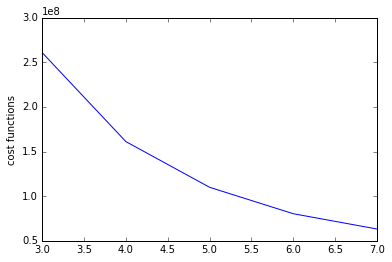

Work for period 14


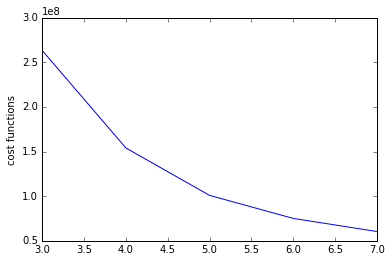

Work for period 28


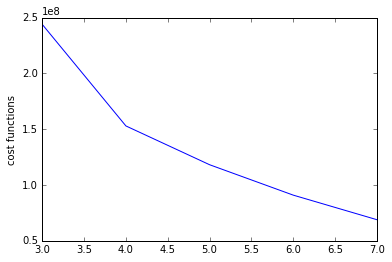

Work for period 56


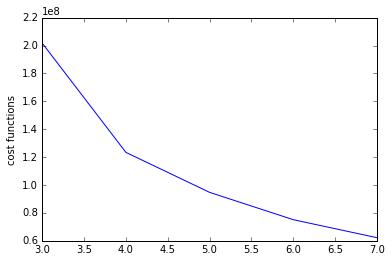

Work for period 200


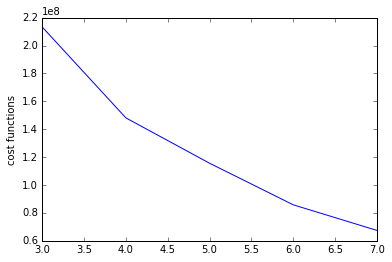

In [15]:
for days in border_times:
    scaling_params = [] # This is pairs of (expected value, variance)
    # this function make each param standart normally distributed
    def scaling(df):
        for x in used_names:
            exp_val = df[x].median()
            variance = df[x].var()
            scaling_params.append((exp_val,variance**0.5))
            df[x].apply(lambda x: (x-exp_val)/variance)
            q = df[x].quantile([0.01,0.99])
            def quan(x):
                if x<q[0.01] or x>q[0.99]:
                    return q[0.01] if x<q[0.01] else q[0.99]
                return x
            df[x].apply(quan)
        return df
    # this function return converts values back
    def rescaling(values):
        print (scaling_params,values)
        return [x[0][0]+x[0][1]*x[1] for x in zip(scaling_params,values)]
    df = pd.read_csv('preprocessed_%d.csv'%days, sep = '|', low_memory = False)
    df = scaling(df)
    # print plots for elbow rule
    print 'Work for period %d'%days
    proceed_values(df)